In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
finance = pd.read_csv("Train.csv")

In [3]:
finance.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### Exploratory Data Analysis

##### Univariate Analysis

In [66]:
country = finance.groupby(["country"])["country"].count()
country

country
Kenya       6068
Rwanda      8735
Tanzania    6620
Uganda      2101
Name: country, dtype: int64

In [5]:
percentages = country/country.sum() * 100
percentages

country
Kenya       25.794933
Rwanda      37.132290
Tanzania    28.141473
Uganda       8.931304
Name: country, dtype: float64

In [6]:
percentages.sum()

100.0

<Axes: xlabel='country'>

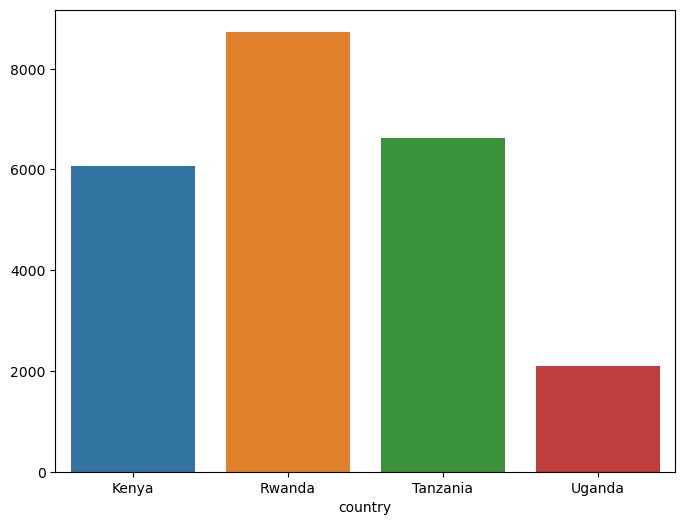

In [7]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
sns.barplot(x=country.index, y=country.values, ax=ax)

Text(0.5, 1.0, 'Respondents per Country')

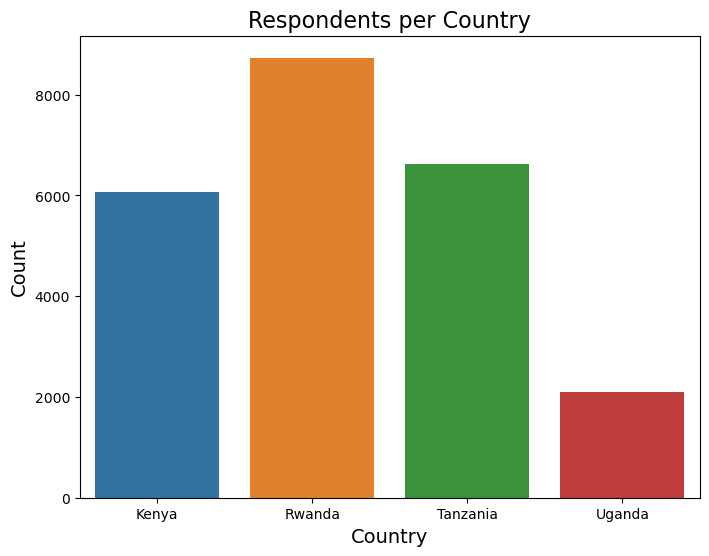

In [8]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
sns.barplot(x=country.index, y=country.values, ax=ax)
# label the axis and setting fontsize as 14
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Respondents per Country", fontsize=16)

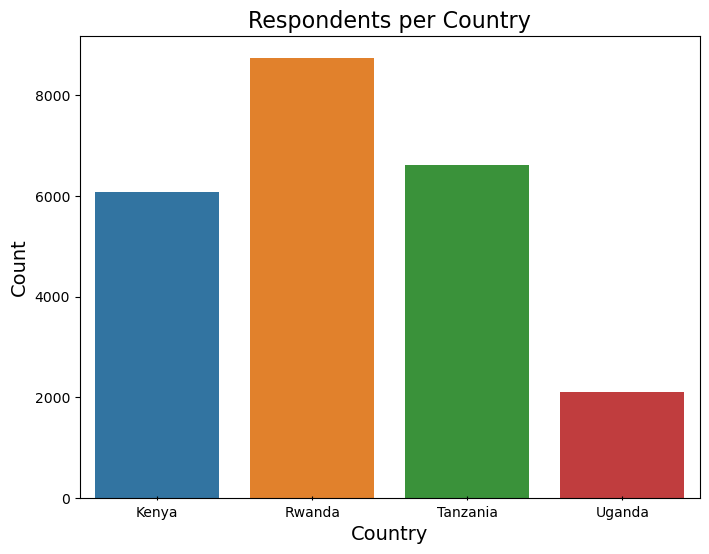

In [9]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
sns.barplot(x=country.index, y=country.values, ax=ax)
# label the axis and setting fontsize as 14
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Respondents per Country", fontsize=16)
ax.tick_params(axis='x', labelsize=10, direction='inout')

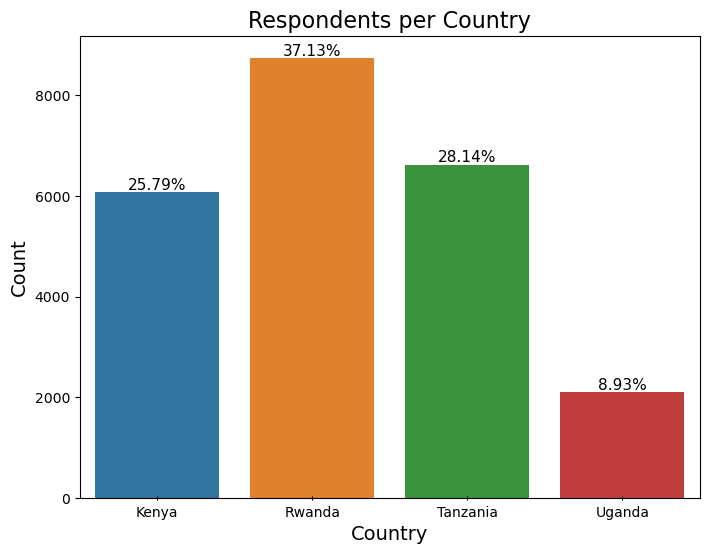

In [10]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
sns.barplot(x=country.index, y=country.values, ax=ax)
# label the axis and setting fontsize as 14
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Respondents per Country", fontsize=16)
ax.tick_params(axis='x', labelsize=10, direction='inout')
#percentage
for i,v in enumerate(country):
    ax.text(i,v+50,f"{percentages.iloc[i]:.2f}%",ha='center',fontsize=11)

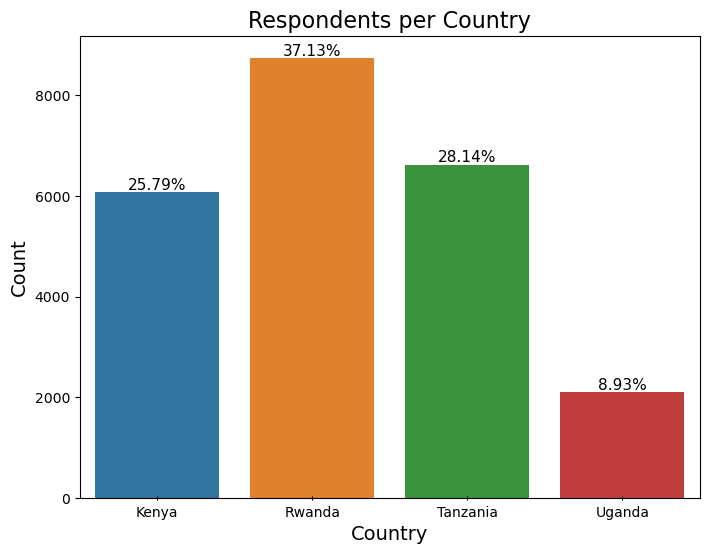

In [11]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
sns.barplot(x=country.index, y=country.values, ax=ax)
# label the axis and setting fontsize as 14
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Respondents per Country", fontsize=16)
ax.tick_params(axis='x', labelsize=10, direction='inout')
#percentage
for i,v in enumerate(country):
    ax.text(i,v+50,f"{percentages.iloc[i]:.2f}%",ha='center',fontsize=11)

fig.savefig("country.jpeg")

In [12]:
account = finance.groupby(["bank_account"])["bank_account"].count()
account

bank_account
No     20212
Yes     3312
Name: bank_account, dtype: int64

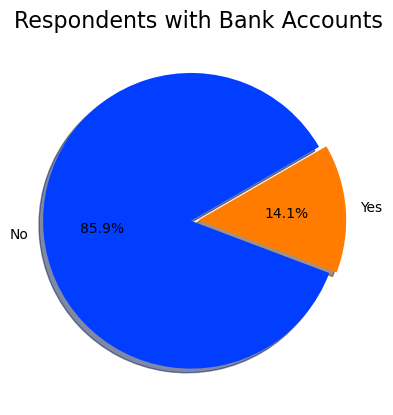

In [16]:
plt.pie(x=account.values, labels = account.index,
        colors = sns.color_palette('bright')[0:5], autopct='%1.1f%%',
        explode=[0.05, 0], startangle=30, shadow=True)

plt.title('Respondents with Bank Accounts', fontsize=16)

plt.savefig('bankaccounts.png')

plt.show()

In [17]:
location=finance.groupby(['location_type'])['location_type'].count()
location

location_type
Rural    14343
Urban     9181
Name: location_type, dtype: int64

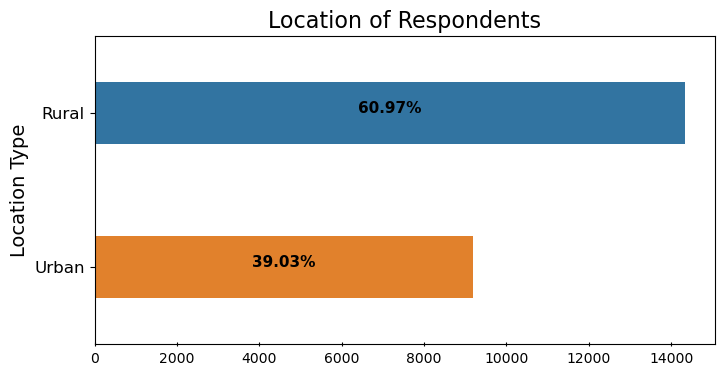

In [34]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 4))
sns.barplot(x=location.values, y=location.index, width=0.4, ax=ax)
# label the axis and setting fontsize as 14
ax.set_ylabel("Location Type", fontsize=14)
#ax.set_xlabel("Respondent's Location", fontsize=14)
ax.set_title("Location of Respondents", fontsize=16)
ax.tick_params(axis='x', labelsize=10, direction='inout')

percent = location/location.sum() * 100
for j,k in enumerate(location):
    ax.text(k/2,j,f"{percent.iloc[j]:.2f}%", color='black', ha='center', fontsize=11, fontweight='bold')

ax.tick_params(axis='y', labelsize=12)

fig.savefig("location.jpeg")

household size

In [22]:
household = finance.groupby(["household_size"])["household_size"].count()
household

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: household_size, dtype: int64

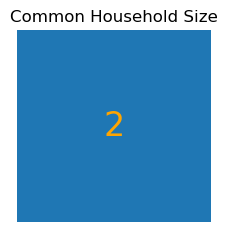

In [32]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(2.5, 2.5))
rect = plt.Rectangle((0,0),1,1,fill=True)
ax.add_patch(rect)

# add text 
ax.text(0.5,0.5,finance['household_size'].mode()[0],ha='center', va='center', fontsize=24, color='orange', fontweight=300)
ax.set_title('Common Household Size')
# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

fig.savefig('common_house_size.jpeg')

plt.show()

In [36]:
ave_age = np.round(finance['age_of_respondent'].mean(), 2)
ave_age

38.81

In [38]:
max_age = finance['age_of_respondent'].max()
max_age

100

In [39]:
min_age = finance['age_of_respondent'].min()
min_age

16

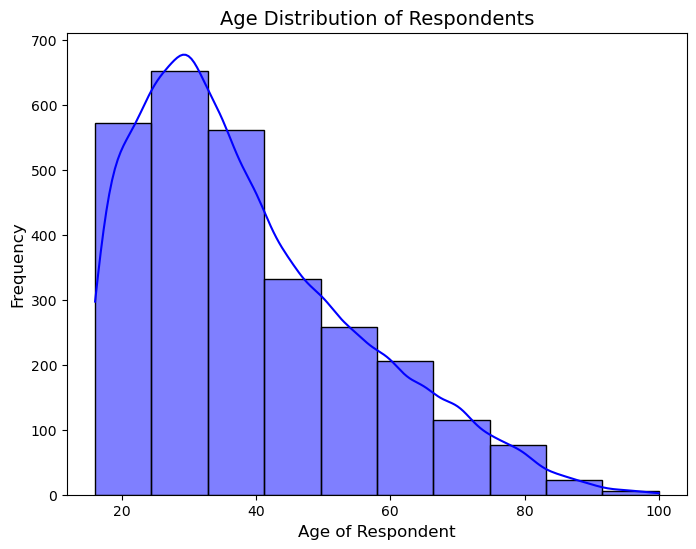

In [75]:
# visualize

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.histplot(data=finance,x='age_of_respondent',stat='frequency',bins=10, kde=True, color='blue')

ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Age of Respondent', fontsize=12)
ax.set_title("Age Distribution of Respondents", fontsize=14)

fig.savefig('age_distribution.jpeg')

plt.show()

In [53]:
gender = finance["gender_of_respondent"].value_counts()
gender

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

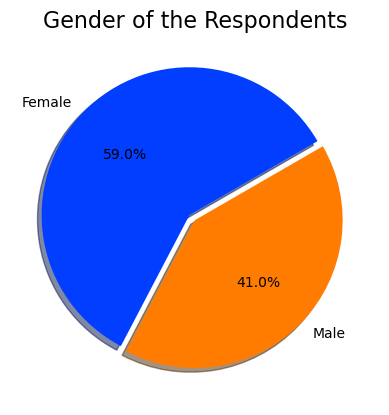

In [51]:
plt.pie(x=gender.values, labels = gender.index,
        colors = sns.color_palette('bright')[0:5], autopct='%1.1f%%',
        explode=[0.05, 0], startangle=30, shadow=True)

plt.title('Gender of the Respondents', fontsize=16)

plt.savefig('bankaccounts.png')

plt.show()

In [64]:
# relationship_with_head
relationship_with_head = finance['relationship_with_head'].value_counts()
relationship_with_head

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

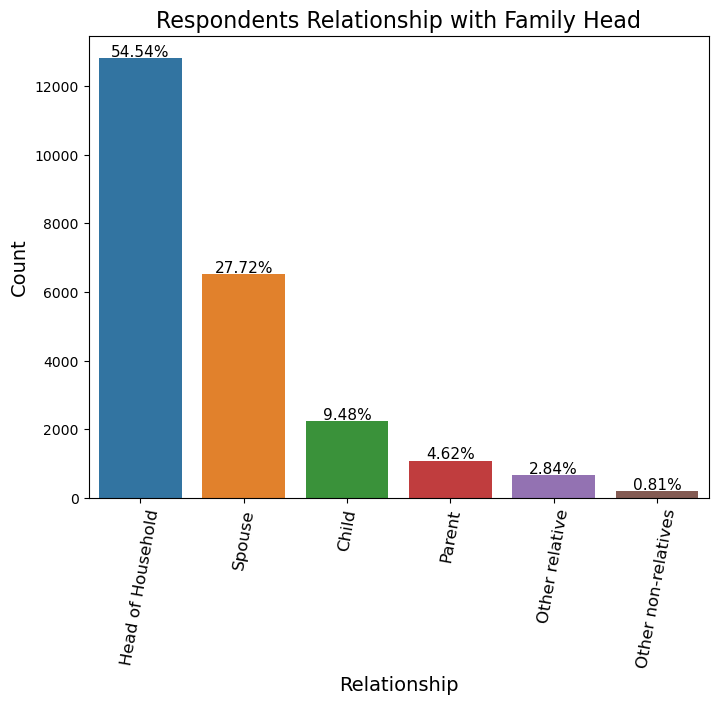

In [68]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.barplot(x=relationship_with_head.index, y=relationship_with_head.values, ax=ax)
# label the axis
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Relationship", fontsize=14)
ax.set_title("Respondents Relationship with Family Head", fontsize=16)
# Set the size of the x-tick labels
# also rotate the x-ticks
ax.tick_params(axis='x', labelsize=12, rotation=80)
# Add values on top of bars
percentage = relationship_with_head/relationship_with_head.sum() * 100
for i,v in enumerate(relationship_with_head):
    ax.text(i,v+50,f"{percentage.iloc[i]:.2f}%",ha='center',fontsize=11)

fig.savefig("relationship_with_head.jpeg")